In [1]:
import polars as pl
import pandas as pd 
from tableone import TableOne 


## 1. Table 1 descriptive des caractéristiques de la population étudiée à l'inclusion (baseline)

## 1.1 Importation des dataset et concatination avec polars (Je pense que je prefere polars par rapport a pandas)

In [2]:
import os 
os.getcwd()

'c:\\Users\\Abdo\\OneDrive\\Desktop\\M1\\Data Challenge 1\\Projet\\Table1'

In [3]:
# Variable antecedant medicaux : 
	# MHTERM : MEDICAL CONDITION
	# MHOCCUR : PAST HISTORY ( YES / NO )
    
mh1 = pl.read_csv(r"C:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\ascii-data-files-nida-ctn-0001-20251024\mh.csv")   # Antecedent médicaux
mh2 =pl.read_csv(r"C:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\ascii-data-files-nida-ctn-0002-20251027\mh.csv")
MH = pl.concat([mh1, mh2], how="vertical")

#-----------------------------------------------------------------------------------------

# Variable laboratoire : 



lb1 = pl.read_csv(r"C:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\ascii-data-files-nida-ctn-0001-20251024\lb.csv")   # Laboratory
lb2 =pl.read_csv(r"C:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\ascii-data-files-nida-ctn-0002-20251027\lb.csv")
LB = pl.concat([lb1, lb2], how="vertical")

## 1.2 Variable Demographique

In [4]:
## DM : Demographie
# Variable demo : 
    # GENDER (form DM )
	# AGE (form DM )
	# ARM (form DM )	
	# MARTIAL ( form SC ) 
	# EDUCYRS ( form SC ) 
	# EMPLOYMENT (form SC ) 
	# BMI (form VS)
dm1 = pl.read_csv(r"C:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\ascii-data-files-nida-ctn-0001-20251024\dm.csv")   # Démographie
dm2 =pl.read_csv(r"C:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\ascii-data-files-nida-ctn-0002-20251027\dm.csv")
DM = pl.concat([dm1, dm2], how="vertical")

In [5]:
DM.columns

['STUDYID',
 'DOMAIN',
 'USUBJID',
 'EPOCH',
 'VISIT',
 'VISITNUM',
 'RFSTDTC',
 'RFENDTC',
 'SITEID',
 'BRTHDTC',
 'AGE',
 'AGEU',
 'SEX',
 'RACE',
 'ETHNIC',
 'ARMCD',
 'ARM',
 'COUNTRY',
 'DMDTC',
 'DMDY']

In [6]:
# Liste des variables representatif des la démographie et identifiant du patient
dm_variables=["STUDYID","USUBJID","ARMCD","AGE","SEX","RACE","BRTHDTC"]
DM=DM.select(pl.col(dm_variables))
DM.columns

['STUDYID', 'USUBJID', 'ARMCD', 'AGE', 'SEX', 'RACE', 'BRTHDTC']

In [7]:
DM.shape

(411, 7)

### Nous avions bien 411 sujet dans l'etude au baseline (Voir code flowchart)

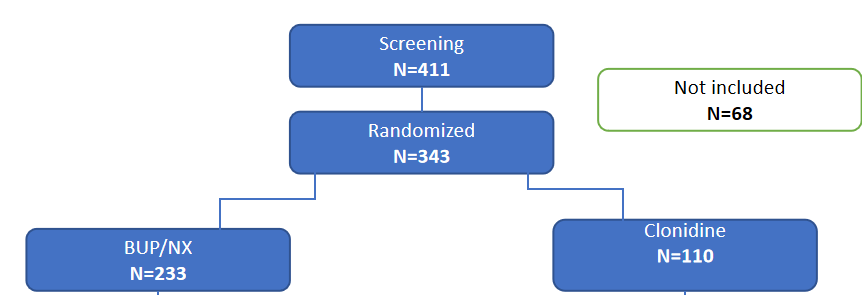

In [8]:
DM.sample(n=3)

STUDYID,USUBJID,ARMCD,AGE,SEX,RACE,BRTHDTC
str,str,str,str,str,str,i64
"""NIDA-CTN-0002""","""02_045101""","""BUPNAL""","""40.985626283""","""M""","""WHITE""",1960
"""NIDA-CTN-0001""","""01_050242""","""SCRFAIL""",""" ""","""M""","""SPANISH, HISPANIC, OR LATINO""",1976
"""NIDA-CTN-0001""","""01_085459""","""BUPNAL""","""35.967145791""","""F""","""WHITE""",1965


#### Recuperer le information d education , martial et emploie depuis la table SC et l ajouter à notre table DM0 (Demographique)

In [9]:
SC1=pl.read_csv(r"C:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\ascii-data-files-nida-ctn-0001-20251024\sc.csv")
SC2=pl.read_csv(r"C:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\ascii-data-files-nida-ctn-0002-20251027\sc.csv")

SC = pl.concat([SC1, SC2], how="vertical")

In [10]:
variableSC_DM = ["EDUCYRS", "MARITAL", "EMPLOY30"]
SC.select("SCTESTCD").unique().sort("SCTESTCD")

SCTESTCD
str
"""ALLINCL"""
"""EDUCYRS"""
"""EMPLOY30"""
"""EMPLOY3Y"""
"""MARITAL"""


In [11]:
SC=SC.filter(pl.col("SCTESTCD").is_in(variableSC_DM))

In [12]:
SC=SC.select(pl.col("USUBJID"),
             pl.col('SCTESTCD'),
             pl.col("SCORRES"))

In [13]:
SC.sample(n=3)

USUBJID,SCTESTCD,SCORRES
str,str,str
"""02_049835""","""EMPLOY30""","""UNEMPLOYED"""
"""02_092156""","""EMPLOY30""","""PART TIME (IRREGULAR DAYWORK)"""
"""02_023926""","""EDUCYRS""","""12"""


In [14]:
SC=SC.select(pl.col("USUBJID"),
             pl.col('SCTESTCD'),
             pl.col("SCORRES"))

In [15]:
SC.select(pl.col("SCTESTCD")).unique()

SCTESTCD
str
"""EMPLOY30"""
"""MARITAL"""
"""EDUCYRS"""


In [16]:
# Pivot : long -> wide (1 ligne par patient)
SC=SC.pivot(
    index="USUBJID",
    columns="SCTESTCD",
    values="SCORRES",
    
)

C:\Users\Abdo\AppData\Local\Temp\ipykernel_336\4109266445.py:2: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  SC=SC.pivot(


In [17]:
SC.sample(n=3)

USUBJID,EDUCYRS,EMPLOY30,MARITAL
str,str,str,str
"""02_005069""","""12""","""FULL TIME (35+ HRS/WK)""","""LIVING WITH PARTNER/COHABITATI…"
"""02_039051""","""12""","""FULL TIME (35+ HRS/WK)""","""DIVORCED"""
"""01_050242""","""12""","""UNEMPLOYED""","""NEVER MARRIED"""


In [18]:
DM_SC= DM.join(SC, on="USUBJID", how="left")
DM_SC.sample(n=3)

STUDYID,USUBJID,ARMCD,AGE,SEX,RACE,BRTHDTC,EDUCYRS,EMPLOY30,MARITAL
str,str,str,str,str,str,i64,str,str,str
"""NIDA-CTN-0002""","""02_034511""","""BUPNAL""","""34.01779603""","""M""","""WHITE""",1967,"""15""","""FULL TIME (35+ HRS/WK)""","""NEVER MARRIED"""
"""NIDA-CTN-0002""","""02_070003""","""SCRFAIL""",""" ""","""F""","""OTHER""",1958,"""14""","""FULL TIME (35+ HRS/WK)""","""LEGALLY MARRIED"""
"""NIDA-CTN-0002""","""02_091708""","""CLON""","""55.978097194""","""M""","""OTHER""",1945,"""14""","""PART TIME (IRREGULAR DAYWORK)""","""DIVORCED"""


In [19]:
DM_SC = DM_SC.with_columns([
    # Nettoyer AGE
    pl.col("AGE")
        .str.strip_chars()                        # enlever les espaces
        .replace("", None)                    # remplacer vide par null
        .cast(pl.Float64, strict=False)       # convertir, sans planter
        .alias("AGE"),

    # Nettoyer EDUCYSR
    pl.col("EDUCYRS")
        .str.strip_chars()
        .replace("", None)
        .cast(pl.Float64, strict=False)
        .alias("EDUCYRS")
])


In [20]:
DM_SC.sample(n=3)

STUDYID,USUBJID,ARMCD,AGE,SEX,RACE,BRTHDTC,EDUCYRS,EMPLOY30,MARITAL
str,str,str,f64,str,str,i64,f64,str,str
"""NIDA-CTN-0001""","""01_003330""","""CLON""",32.0,"""M""","""SPANISH, HISPANIC, OR LATINO""",1969,13.0,"""FULL TIME (35+ HRS/WK)""","""LEGALLY MARRIED"""
"""NIDA-CTN-0002""","""02_021152""","""CLON""",41.998631,"""F""","""WHITE""",1959,9.0,"""FULL TIME (35+ HRS/WK)""","""SEPARATED"""
"""NIDA-CTN-0002""","""02_015027""","""BUPNAL""",50.428474,"""M""","""BLACK, AFRICAN AMERICAN, OR NE…",1951,12.0,"""PART TIME (IRREGULAR DAYWORK)""","""DIVORCED"""


#### Recuperer le poids et la taille dans la table VS pour creer le BMI et l ajouter à notre table DMO (Demographique)

In [21]:

# Variable signe vitauxx :
	# DBP : Pression diastolique (mmHg)
	# SBP : Pression systolique (mmHg)
	# HEIGHT : taille
	# WEIGHT : poids
	# PULSE : fréquence cardiaque (heart rate)
	# RESP : Frequence respiratoire (/min)
	# TEMP : Temperature corporelle (F)

VS1 = pl.read_csv(r"C:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\ascii-data-files-nida-ctn-0001-20251024\vs.csv")   # Signe vitaux 
VS2 =pl.read_csv(r"C:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\ascii-data-files-nida-ctn-0002-20251027\vs.csv")
VS= VS = pl.concat([VS1, VS2], how="vertical")

In [22]:
mesure_anthro=["HEIGHT","WEIGHT"]
VS_BMI=VS.filter(pl.col("VSTESTCD").is_in(mesure_anthro))

In [23]:
VS_BMI.sample(n=3)

STUDYID,DOMAIN,USUBJID,EPOCH,VSSEQ,VSTESTCD,VSTEST,VSCAT,VSPOS,VSORRES,VSORRESU,VSSTRESC,VSSTRESN,VSSTRESU,VSBLFL,VISIT,VISITNUM,VSDTC,VSDY
str,str,str,str,i64,str,str,str,str,f64,str,f64,f64,str,str,str,i64,i64,i64
"""NIDA-CTN-0002""","""VS""","""02_029311""","""SCREENING""",7,"""HEIGHT""","""HEIGHT""","""PHYSICAL EXAMINATION FORM""",null,68.0,"""INCHES""",68.0,68.0,"""INCHES""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1
"""NIDA-CTN-0001""","""VS""","""01_076607""","""SCREENING""",6,"""HEIGHT""","""HEIGHT""","""PHYSICAL EXAMINATION FORM""",null,72.0,"""INCHES""",72.0,72.0,"""INCHES""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1
"""NIDA-CTN-0002""","""VS""","""02_034511""","""SCREENING""",7,"""WEIGHT""","""WEIGHT""","""PHYSICAL EXAMINATION FORM""",null,139.0,"""POUNDS""",139.0,139.0,"""POUNDS""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1


In [24]:
VS_BMI.select(pl.col("VSTESTCD")).unique()

VSTESTCD
str
"""WEIGHT"""
"""HEIGHT"""


In [25]:
VS_BMI=VS_BMI.select(pl.col("USUBJID"),
             pl.col('VSTESTCD'),
             pl.col("VSORRES"))

In [26]:
VS_BMI.sample(n=3)

USUBJID,VSTESTCD,VSORRES
str,str,f64
"""01_063935""","""WEIGHT""",150.0
"""01_024957""","""WEIGHT""",168.0
"""01_057109""","""HEIGHT""",70.0


In [27]:
# Pivot : long -> wide (1 ligne par patient)
VS_BMI_pivot=VS_BMI.pivot(
    index="USUBJID",
    columns="VSTESTCD",
    values="VSORRES",
    aggregate_function="mean"
    
)

C:\Users\Abdo\AppData\Local\Temp\ipykernel_336\389727896.py:2: DeprecationWarning: the argument `columns` for `DataFrame.pivot` is deprecated. It was renamed to `on` in version 1.0.0.
  VS_BMI_pivot=VS_BMI.pivot(


In [28]:
VS_BMI_pivot.sample(n=3)

USUBJID,HEIGHT,WEIGHT
str,f64,f64
"""02_043183""",66.0,138.0
"""01_068916""",66.0,145.0
"""02_078453""",70.0,299.0


In [29]:
VS_BMI = VS_BMI_pivot.with_columns([
    # Conversion vers kg et mètres
    (pl.col("WEIGHT") * 0.453592).alias("weight_kg"),
    (pl.col("HEIGHT") * 0.0254).alias("height_m")
])

VS_BMI = VS_BMI.with_columns([
    (pl.col("weight_kg") / (pl.col("height_m") ** 2)).alias("BMI")
])


In [30]:
VS_BMI

USUBJID,HEIGHT,WEIGHT,weight_kg,height_m,BMI
str,f64,f64,f64,f64,f64
"""01_000579""",67.0,130.0,58.96696,1.7018,20.360653
"""01_001362""",58.0,179.0,81.192968,1.4732,37.410628
"""01_001490""",72.0,155.0,70.30676,1.8288,21.021546
"""01_002844""",60.0,116.0,52.616672,1.524,22.654446
"""01_003330""",70.0,175.0,79.3786,1.778,25.109607
…,…,…,…,…,…
"""02_098074""",62.0,132.0,59.874144,1.5748,24.142848
"""02_098425""",71.0,250.0,113.398,1.8034,34.867537
"""02_099053""",67.0,135.0,61.23492,1.7018,21.143755


In [31]:
VS_BMI = VS_BMI.drop(["HEIGHT", "WEIGHT","weight_kg","height_m"])


In [32]:
DM_SC_BMI= DM_SC.join(VS_BMI, on="USUBJID", how="left")
DM_SC_BMI.sample(n=3)

STUDYID,USUBJID,ARMCD,AGE,SEX,RACE,BRTHDTC,EDUCYRS,EMPLOY30,MARITAL,BMI
str,str,str,f64,str,str,i64,f64,str,str,f64
"""NIDA-CTN-0002""","""02_071868""","""CLON""",32.429843,"""M""","""WHITE""",1969,12.0,"""UNEMPLOYED""","""NEVER MARRIED""",29.853508
"""NIDA-CTN-0001""","""01_001362""","""CLON""",41.429158,"""F""","""BLACK, AFRICAN AMERICAN, OR NE…",1960,13.0,"""UNEMPLOYED""","""NEVER MARRIED""",37.410628
"""NIDA-CTN-0002""","""02_040804""","""BUPNAL""",30.324435,"""M""","""SPANISH, HISPANIC, OR LATINO""",1971,17.0,"""FULL TIME (35+ HRS/WK)""","""NEVER MARRIED""",26.608364


## 1.3 Variables VS ( Signe vitaux )

In [33]:
VS.sample(n=1)

STUDYID,DOMAIN,USUBJID,EPOCH,VSSEQ,VSTESTCD,VSTEST,VSCAT,VSPOS,VSORRES,VSORRESU,VSSTRESC,VSSTRESN,VSSTRESU,VSBLFL,VISIT,VISITNUM,VSDTC,VSDY
str,str,str,str,i64,str,str,str,str,f64,str,f64,f64,str,str,str,i64,i64,i64
"""NIDA-CTN-0002""","""VS""","""02_044884""","""ACTIVE""",39,"""TEMP""","""TEMPERATURE""","""VITAL SIGNS FORM""","""SITTING""",98.3,"""F""",98.3,98.3,"""F""",null,"""STUDY DAY 10""",10,2001,10


In [34]:
# Voir les moments de VISIT 
VS.select(pl.col("VISITNUM")).unique()

VISITNUM
i64
0
3
12
9
15
…
14
11
8


In [35]:
# Filtrer le VS pour ne rester que sur le VISIT = 0 qui represente le Baseline 
VS=VS.filter(pl.col("VISITNUM")==0)

In [36]:
VS.shape

(3150, 19)

In [37]:
VS.sample(2)

STUDYID,DOMAIN,USUBJID,EPOCH,VSSEQ,VSTESTCD,VSTEST,VSCAT,VSPOS,VSORRES,VSORRESU,VSSTRESC,VSSTRESN,VSSTRESU,VSBLFL,VISIT,VISITNUM,VSDTC,VSDY
str,str,str,str,i64,str,str,str,str,f64,str,f64,f64,str,str,str,i64,i64,i64
"""NIDA-CTN-0002""","""VS""","""02_098425""","""SCREENING""",8,"""WEIGHT""","""WEIGHT""","""PHYSICAL EXAMINATION FORM""",null,250.0,"""POUNDS""",250.0,250.0,"""POUNDS""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1
"""NIDA-CTN-0002""","""VS""","""02_081045""","""SCREENING""",7,"""WEIGHT""","""WEIGHT""","""PHYSICAL EXAMINATION FORM""",null,170.0,"""POUNDS""",170.0,170.0,"""POUNDS""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,-9


In [38]:
VS.null_count()

STUDYID,DOMAIN,USUBJID,EPOCH,VSSEQ,VSTESTCD,VSTEST,VSCAT,VSPOS,VSORRES,VSORRESU,VSSTRESC,VSSTRESN,VSSTRESU,VSBLFL,VISIT,VISITNUM,VSDTC,VSDY
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,772,0,7,7,7,6,0,0,0,0,384


In [39]:
# Voir les valeurs representatifs des signe vitaux dans VSTESTCD 
VS.select("VSTESTCD").unique().sort("VSTESTCD")

VSTESTCD
str
"""DBP"""
"""HEIGHT"""
"""PULSE"""
"""RESP"""
"""SBP"""
"""TEMP"""
"""WEIGHT"""


In [40]:
"""
# Liste des variables representatif des signes vitaux 
vs_variables=["DBP","SBP","PULSE","RESP","TEMP"]

VS=VS.filter(pl.col("VSTESTCD").is_in(vs_variables))

# Pivot : long -> wide (1 ligne par patient)
VS_large=VS.pivot(
    index="USUBJID",
    columns="VSTESTCD",
    values="VSORRES",
    
)"""

'\n# Liste des variables representatif des signes vitaux \nvs_variables=["DBP","SBP","PULSE","RESP","TEMP"]\n\nVS=VS.filter(pl.col("VSTESTCD").is_in(vs_variables))\n\n# Pivot : long -> wide (1 ligne par patient)\nVS_large=VS.pivot(\n    index="USUBJID",\n    columns="VSTESTCD",\n    values="VSORRES",\n\n)'

In [41]:
'''# Verifier qu il y a plus 2 valeur pour tout les patients 
doublons_global = (
    VS
    .group_by(["USUBJID", "VSTESTCD"])
    .len()
    .filter(pl.col("len") > 1)
)

doublons_global'''

'# Verifier qu il y a plus 2 valeur pour tout les patients \ndoublons_global = (\n    VS\n    .group_by(["USUBJID", "VSTESTCD"])\n    .len()\n    .filter(pl.col("len") > 1)\n)\n\ndoublons_global'

### Remarque 
- Chaque patient doit avoir au max 5 paramètres vitaux au baseline : DBP, SBP, PULSE, RESP, TEMP.

- Des doublons persistent pour certains paramètres vitaux .

- Trois sources expliquent ces doublons :

    - VSPOS : un même test peut être mesuré en SITTING et STANDING au baseline.

    - VSCAT : la catégorie “CLINICAL OPIATE WITHDRAWAL SCALE FORM” (formulaire COWS) fournit aussi une mesure de PULSE, créant une duplication.

    - Mesures répétées dans un même formulaire, même position qui nous donne plusieurs valeurs valides pour un meme patient

- La solution consiste à :

    - filtrer les bons formulaires (VITAL SIGNS / PHYSICAL EXAM),

    - ne garder qu’une position (ex. SITTING),

    - puis regrouper par (USUBJID, VSTESTCD) et conserver la moyenne pour obtenir une valeur unique : ex (Pour 1 patient ,2 valeurs de PULSE  = 75, 78 on fait la moyenne de ces test identique : VSORRES = (75 + 78) / 2 = 76.5)

In [42]:
# Voir les categorie de VSCAT 
VS.select("VSCAT").unique()

VSCAT
str
"""PHYSICAL EXAMINATION FORM"""
"""VITAL SIGNS FORM"""
"""CLINICAL OPIATE WITHDRAWAL SCA…"


In [43]:
VS.select("VSPOS").unique()

VSPOS
str
"""STANDING"""
"""SITTING"""
null


In [44]:
# Formulaires pertinents
vs_forms = ["VITAL SIGNS FORM"]
# Séparation vitaux vs anthropométrie
m_vitaux = ["DBP", "SBP", "PULSE", "RESP", "TEMP"]
# Filtrer signes vitaux classiques (inclut VSPOS)
# HEIGHT et WEIGHT n’ont PAS de VSPOS ce qui pourrais les supprimer si on applique un filtre VSPOS
# Comme on a deja utiliser HEIGHT et  WEIGHT pour calculer le BMI , nous allons appliquer le filtre VSPOS.

VS_vitals = VS.filter(
    pl.col("VSTESTCD").is_in(m_vitaux)
    & pl.col("VSCAT").is_in(vs_forms)
    & (pl.col("VSPOS") == "SITTING")   
)

# Corriger les doublons une mesure par patient (Ex : 1 SEULE PULSE )
VS_filtrage = (
    VS_vitals
    .group_by(["USUBJID", "VSTESTCD"])
    .agg(pl.col("VSORRES").cast(pl.Float64).first())
)

# Pivot final : Construit notre tables 
VS_pivotage = VS_filtrage.pivot(
    index="USUBJID",
    on="VSTESTCD",
    values="VSORRES"
)


VS = VS_pivotage.select([
    pl.col("USUBJID"),
    pl.col("DBP").alias("diastol_mmHg"),
    pl.col("SBP").alias("systol_mmHg"),
    pl.col("PULSE").alias("battmnt/mn"),
    pl.col("RESP").alias("resp/minute"),
    ((pl.col("TEMP") - 32) * 5/9).alias("TEMP_C")
])


VS


USUBJID,diastol_mmHg,systol_mmHg,battmnt/mn,resp/minute,TEMP_C
str,f64,f64,f64,f64,f64
"""02_049835""",75.0,113.0,55.0,16.0,37.222222
"""02_043156""",76.0,128.0,60.0,12.0,35.555556
"""02_050467""",78.0,120.0,68.0,18.0,37.333333
"""02_021273""",70.0,110.0,66.0,18.0,37.111111
"""02_019718""",100.0,154.0,84.0,12.0,36.666667
…,…,…,…,…,…
"""02_012721""",78.0,104.0,68.0,16.0,37.666667
"""02_057815""",83.0,116.0,78.0,16.0,36.666667
"""02_070407""",76.0,118.0,84.0,18.0,37.222222


In [45]:
# Verifier qu il y a plus 2 valeur pour tout les patients 
VS.group_by("USUBJID").count().filter(pl.col("count") > 1)

C:\Users\Abdo\AppData\Local\Temp\ipykernel_336\2510867944.py:2: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  VS.group_by("USUBJID").count().filter(pl.col("count") > 1)


USUBJID,count
str,u32


In [46]:
#Voir valeurs manquante apres filtrage 
print(VS_filtrage.null_count())
#Il y avais 0 valeurs manquante des parametre vitaux contenue dans VSORRES apres le filtrage 

shape: (1, 3)
┌─────────┬──────────┬─────────┐
│ USUBJID ┆ VSTESTCD ┆ VSORRES │
│ ---     ┆ ---      ┆ ---     │
│ u32     ┆ u32      ┆ u32     │
╞═════════╪══════════╪═════════╡
│ 0       ┆ 0        ┆ 0       │
└─────────┴──────────┴─────────┘


In [47]:
#Voir valeurs manquante apres pivotage 
print(VS_pivotage.null_count())
#On observe des  valeurs manquante des certaines  parametre vitaux apres pivotage  

shape: (1, 6)
┌─────────┬───────┬──────┬─────┬─────┬──────┐
│ USUBJID ┆ PULSE ┆ RESP ┆ SBP ┆ DBP ┆ TEMP │
│ ---     ┆ ---   ┆ ---  ┆ --- ┆ --- ┆ ---  │
│ u32     ┆ u32   ┆ u32  ┆ u32 ┆ u32 ┆ u32  │
╞═════════╪═══════╪══════╪═════╪═════╪══════╡
│ 0       ┆ 1     ┆ 7    ┆ 0   ┆ 0   ┆ 8    │
└─────────┴───────┴──────┴─────┴─────┴──────┘


In [48]:
#### Apres pivotage on observe des Valeurs Manquante alors qu au debut y avais pas . 
# Le pivotage a creer des valeurs manquante , la cause est que chaque patient n’avais pas forcément toutes les 5 mesures.

print(VS.null_count())
VS1.shape

shape: (1, 6)
┌─────────┬──────────────┬─────────────┬────────────┬─────────────┬────────┐
│ USUBJID ┆ diastol_mmHg ┆ systol_mmHg ┆ battmnt/mn ┆ resp/minute ┆ TEMP_C │
│ ---     ┆ ---          ┆ ---         ┆ ---        ┆ ---         ┆ ---    │
│ u32     ┆ u32          ┆ u32         ┆ u32        ┆ u32         ┆ u32    │
╞═════════╪══════════════╪═════════════╪════════════╪═════════════╪════════╡
│ 0       ┆ 0            ┆ 0           ┆ 1          ┆ 7           ┆ 8      │
└─────────┴──────────────┴─────────────┴────────────┴─────────────┴────────┘


(7837, 19)

In [49]:
# supprimer les lignes où tout est null
VS = VS.filter(
    pl.any_horizontal(pl.all().is_not_null())
)

In [50]:
print(VS.null_count())
VS.shape

shape: (1, 6)
┌─────────┬──────────────┬─────────────┬────────────┬─────────────┬────────┐
│ USUBJID ┆ diastol_mmHg ┆ systol_mmHg ┆ battmnt/mn ┆ resp/minute ┆ TEMP_C │
│ ---     ┆ ---          ┆ ---         ┆ ---        ┆ ---         ┆ ---    │
│ u32     ┆ u32          ┆ u32         ┆ u32        ┆ u32         ┆ u32    │
╞═════════╪══════════════╪═════════════╪════════════╪═════════════╪════════╡
│ 0       ┆ 0            ┆ 0           ┆ 1          ┆ 7           ┆ 8      │
└─────────┴──────────────┴─────────────┴────────────┴─────────────┴────────┘


(386, 6)

In [51]:
## Pour la jointure  
DM=DM.select(pl.col("STUDYID"),
             pl.col("USUBJID"),
             pl.col("ARMCD"))

In [52]:
### Nous allons maintenant joindre la table VS avec DM_SC_BMI

DM_SC_BMI_VS= DM_SC_BMI.join(VS, on="USUBJID", how="left")
DM_SC_BMI_VS.sample(n=3)

STUDYID,USUBJID,ARMCD,AGE,SEX,RACE,BRTHDTC,EDUCYRS,EMPLOY30,MARITAL,BMI,diastol_mmHg,systol_mmHg,battmnt/mn,resp/minute,TEMP_C
str,str,str,f64,str,str,i64,f64,str,str,f64,f64,f64,f64,f64,f64
"""NIDA-CTN-0002""","""02_046717""","""CLON""",33.724846,"""M""","""SPANISH, HISPANIC, OR LATINO""",1967,10.0,"""UNEMPLOYED""","""NEVER MARRIED""",27.118376,75.0,131.0,58.0,16.0,37.444444
"""NIDA-CTN-0001""","""01_020369""","""CLON""",39.882272,"""M""","""BLACK, AFRICAN AMERICAN, OR NE…",1961,13.0,"""UNEMPLOYED""","""NEVER MARRIED""",34.280392,88.0,138.0,86.0,20.0,36.333333
"""NIDA-CTN-0001""","""01_091487""","""CLON""",29.130732,"""M""","""WHITE""",1972,16.0,"""FULL TIME (35+ HRS/WK)""","""LIVING WITH PARTNER/COHABITATI…",21.157169,64.0,122.0,90.0,16.0,37.0


In [53]:
# Apres avoir joint la dataframe demographique avec celui de signes vitaux , nous avons toujours les 411 sujets , ce qui veut dire que notre jointure à été reussis
DM_SC_BMI_VS.shape

(411, 16)

## 1.4 Variables laboratoire 

In [54]:
# Filtre baseline & echantillon
LB=LB.filter(pl.col("VISITNUM")==0)
LB.sample(n=2)

STUDYID,DOMAIN,USUBJID,EPOCH,LBSEQ,LBTESTCD,LBTEST,LBCAT,LBORRES,LBORRESU,LBORNRLO,LBORNRHI,LBSTRESC,LBSTRESN,LBSTRESU,LBSTNRLO,LBSTNRHI,LBNRIND,LBSTAT,LBREASND,LBSPEC,LBMETHOD,LBBLFL,VISIT,VISITNUM,LBDTC,LBDY
str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str
"""NIDA-CTN-0001""","""LB""","""01_050019""","""SCREENING""",1,"""AMPHET""","""AMPHETAMINES""","""DRUG SCREEN""","""NEGATIVE""",null,null,null,"""NEGATIVE""",""" """,null,""" """,""" """,null,null,null,"""URINE""","""ACCUTEST""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2002,"""1"""
"""NIDA-CTN-0001""","""LB""","""01_075298""","""SCREENING""",1,"""AMPHET""","""AMPHETAMINES""","""DRUG SCREEN""","""NEGATIVE""",null,null,null,"""NEGATIVE""",""" """,null,""" """,""" """,null,null,null,"""URINE""","""ACCUTEST""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,"""1"""


In [55]:
LB.select(pl.col("LBTESTCD")).unique().to_series().to_list()

['CREAT',
 'BENZOD',
 'PCP',
 'MORPHINE',
 'NONE',
 'TCA',
 'METH',
 'OPIATE',
 'AMPHET',
 'METHADON',
 'THC',
 'BARBIT',
 'COCAINE']

In [56]:
LB.filter(pl.col("USUBJID")=="01_065758")

STUDYID,DOMAIN,USUBJID,EPOCH,LBSEQ,LBTESTCD,LBTEST,LBCAT,LBORRES,LBORRESU,LBORNRLO,LBORNRHI,LBSTRESC,LBSTRESN,LBSTRESU,LBSTNRLO,LBSTNRHI,LBNRIND,LBSTAT,LBREASND,LBSPEC,LBMETHOD,LBBLFL,VISIT,VISITNUM,LBDTC,LBDY
str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str
"""NIDA-CTN-0001""","""LB""","""01_065758""","""SCREENING""",1,"""AMPHET""","""AMPHETAMINES""","""DRUG SCREEN""","""NEGATIVE""",null,null,null,"""NEGATIVE""",""" """,null,""" """,""" """,null,null,null,"""URINE""","""ACCUTEST""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,"""1"""
"""NIDA-CTN-0001""","""LB""","""01_065758""","""SCREENING""",11,"""AMPHET""","""AMPHETAMINES""","""DRUG SCREEN""","""NEGATIVE""",null,null,null,"""NEGATIVE""",""" """,null,""" """,""" """,null,null,null,"""URINE""","""CENTRAL LAB""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,"""1"""
"""NIDA-CTN-0001""","""LB""","""01_065758""","""SCREENING""",2,"""BARBIT""","""BARBITURATES""","""DRUG SCREEN""","""NEGATIVE""",null,null,null,"""NEGATIVE""",""" """,null,""" """,""" """,null,null,null,"""URINE""","""ACCUTEST""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,"""1"""
"""NIDA-CTN-0001""","""LB""","""01_065758""","""SCREENING""",3,"""BENZOD""","""BENZODIAZEPINES""","""DRUG SCREEN""","""NEGATIVE""",null,null,null,"""NEGATIVE""",""" """,null,""" """,""" """,null,null,null,"""URINE""","""ACCUTEST""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,"""1"""
"""NIDA-CTN-0001""","""LB""","""01_065758""","""SCREENING""",12,"""BENZOD""","""BENZODIAZEPINES""","""DRUG SCREEN""","""NEGATIVE""",null,null,null,"""NEGATIVE""",""" """,null,""" """,""" """,null,null,null,"""URINE""","""CENTRAL LAB""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,"""1"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""NIDA-CTN-0001""","""LB""","""01_065758""","""SCREENING""",16,"""OPIATE""","""OPIATE""","""DRUG SCREEN""","""POSITIVE""",null,null,null,"""POSITIVE""",""" """,null,""" """,""" """,null,null,null,"""URINE""","""CENTRAL LAB""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,"""1"""
"""NIDA-CTN-0001""","""LB""","""01_065758""","""SCREENING""",8,"""PCP""","""PCP""","""DRUG SCREEN""","""NEGATIVE""",null,null,null,"""NEGATIVE""",""" """,null,""" """,""" """,null,null,null,"""URINE""","""ACCUTEST""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,"""1"""
"""NIDA-CTN-0001""","""LB""","""01_065758""","""SCREENING""",9,"""TCA""","""TCA""","""DRUG SCREEN""","""NEGATIVE""",null,null,null,"""NEGATIVE""",""" """,null,""" """,""" """,null,null,null,"""URINE""","""ACCUTEST""","""Y""","""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,"""1"""


####

Lors de l’analyse du domaine LB, nous avons observé que l’ensemble des tests urinaires n’était pas disponible dans les deux modalités d’analyse (LBMETHOD).
Une exploration systématique des valeurs uniques a montré :
- Tests disponibles en ACCUTEST (10 tests) 
Ces tests correspondent au panel immunologique rapide utilisé pour un retour immédiat des résultats
    - COCAINE
    - BENZOD
    - AMPHET,
    - METH,
    - METHADON,
    - TCA,
    - MORPHINE,
    - PCP,
    - THC,
    - BARBIT
- Tests disponibles en CENTRAL LAB (7 tests + 1 test non mappé)
 Analyses confirmatoires réalisées par le laboratoire central (valeurs officielles)
    - AMPHET, 
    - COCAINE, 
    - BENZOD, 
    - OPIATE,
    - NONE, 
    - CREAT, 
    - THC, 
    - METHADON

Conclusions  : Les panels ne sont pas identiques entre ACCUTEST et CENTRAL LAB.

Certains tests (ex. MORPHINE, PCP, BARBIT, TCA) n’existent pas dans le laboratoire central.

Pour harmoniser les données, nous avons donc retenu une stratégie en deux étapes :
(1) prioriser les résultats du CENTRAL LAB lorsque disponibles,
(2) utiliser ACCUTEST uniquement comme valeur de remplacement pour les tests absents du laboratoire central.

In [57]:
#selectionner uniquement les colonnes necessaire dans le lb
LB0=LB.select(pl.col("USUBJID"),
              pl.col("LBTESTCD"),
              pl.col("LBORRES"),
              pl.col("LBMETHOD"),)
LB0.sample(n=3)

USUBJID,LBTESTCD,LBORRES,LBMETHOD
str,str,str,str
"""02_021463""","""AMPHET""","""NEGATIVE""","""CENTRAL LAB"""
"""01_029678""","""AMPHET""","""NEGATIVE""","""CENTRAL LAB"""
"""02_094986""","""BENZOD""","""NEGATIVE""","""ACCUTEST"""


In [58]:
# Creer une colonne de priorité 
# CENTRAL LAB = priorité 1 (à garder en premier)
# ACCUTEST = priorité 2 (fallback)
LB_test = LB0.with_columns(
    pl.when(pl.col("LBMETHOD") == "CENTRAL LAB")
      .then(1)
      .otherwise(2)
      .alias("priority")
)
# trier pour mettre CENTRAL LAB avant ACCUTEST
LB_test = LB_test.sort(["USUBJID", "LBTESTCD", "priority"])
# choisir UNE SEULE valeur par patient et par test
LB_test = LB_test.group_by(["USUBJID", "LBTESTCD"]).agg(
    pl.col("LBORRES").first().alias("LBORRES") # First car après le tri, CENTRAL LAB est toujours en premier.
)
# pivot pour une table wide
LB_test_pivots = LB_test.pivot(
    index="USUBJID",
    on="LBTESTCD",
    values="LBORRES"
)



In [59]:
LB_test_pivots

USUBJID,METH,BENZOD,OPIATE,BARBIT,AMPHET,MORPHINE,METHADON,TCA,THC,CREAT,PCP,COCAINE,NONE
str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""01_038465""","""NEGATIVE""","""POSITIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""155.5""","""NEGATIVE""","""NEGATIVE""",null
"""02_067891""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""205.5""","""POSITIVE""","""NEGATIVE""",null
"""01_003330""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""86.1""","""NEGATIVE""","""NEGATIVE""",null
"""02_059257""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""105.4""","""NEGATIVE""","""NEGATIVE""",null
"""02_072701""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""303.8""","""NEGATIVE""","""POSITIVE""",null
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""01_001362""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""176.6""","""POSITIVE""","""POSITIVE""",null
"""02_095071""","""NEGATIVE""","""NEGATIVE""",null,"""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""",null,"""NEGATIVE""","""NEGATIVE""",null
"""01_086738""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""POSITIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""11.4""","""NEGATIVE""","""NEGATIVE""",null


In [60]:
LB_test_pivots = LB_test_pivots.with_columns(
        pl.col("CREAT")
        .str.replace(",", ".")       # si certaines valeurs sont en format  "1,2"
        .cast(pl.Float64, strict=False)
        .alias("CREAT"))
    
LB_test_pivots = LB_test_pivots.drop("NONE")


In [61]:
LB_test_pivots

USUBJID,METH,BENZOD,OPIATE,BARBIT,AMPHET,MORPHINE,METHADON,TCA,THC,CREAT,PCP,COCAINE
str,str,str,str,str,str,str,str,str,str,f64,str,str
"""01_038465""","""NEGATIVE""","""POSITIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""",155.5,"""NEGATIVE""","""NEGATIVE"""
"""02_067891""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""",205.5,"""POSITIVE""","""NEGATIVE"""
"""01_003330""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""",86.1,"""NEGATIVE""","""NEGATIVE"""
"""02_059257""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""",105.4,"""NEGATIVE""","""NEGATIVE"""
"""02_072701""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""",303.8,"""NEGATIVE""","""POSITIVE"""
…,…,…,…,…,…,…,…,…,…,…,…,…
"""01_001362""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""",176.6,"""POSITIVE""","""POSITIVE"""
"""02_095071""","""NEGATIVE""","""NEGATIVE""",null,"""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""",null,"""NEGATIVE""","""NEGATIVE"""
"""01_086738""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""POSITIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""",11.4,"""NEGATIVE""","""NEGATIVE"""


In [62]:
LB_test_pivots.null_count()

USUBJID,METH,BENZOD,OPIATE,BARBIT,AMPHET,MORPHINE,METHADON,TCA,THC,CREAT,PCP,COCAINE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,3,2,71,4,2,2,1,5,2,71,3,2


In [63]:
LB_test_pivots.shape

(405, 13)

In [64]:
# Supprimer les lignes entièrement nulles
LB_test_pivots_encode = LB_test_pivots.filter(
    pl.any_horizontal(pl.all().is_not_null())
)


In [65]:
LB_test_pivots.null_count()

USUBJID,METH,BENZOD,OPIATE,BARBIT,AMPHET,MORPHINE,METHADON,TCA,THC,CREAT,PCP,COCAINE
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,3,2,71,4,2,2,1,5,2,71,3,2


In [66]:
LB_test_pivots.shape

(405, 13)

In [67]:
### Nous allons maintenant joindre la table LB_test_pivots_encode avec la dataframe demographique , signes vitaux etc.. 

DM_SC_BMI_VS_LB= DM_SC_BMI_VS.join(LB_test_pivots, on="USUBJID", how="left")
DM_SC_BMI_VS_LB.sample(n=3)

STUDYID,USUBJID,ARMCD,AGE,SEX,RACE,BRTHDTC,EDUCYRS,EMPLOY30,MARITAL,BMI,diastol_mmHg,systol_mmHg,battmnt/mn,resp/minute,TEMP_C,METH,BENZOD,OPIATE,BARBIT,AMPHET,MORPHINE,METHADON,TCA,THC,CREAT,PCP,COCAINE
str,str,str,f64,str,str,i64,f64,str,str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str,str,str,str,f64,str,str
"""NIDA-CTN-0001""","""01_074593""","""SCRFAIL""",null,"""M""","""WHITE""",1967,12.0,"""UNEMPLOYED""","""DIVORCED""",29.757877,60.0,100.0,73.0,14.0,36.5,"""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""",294.1,"""NEGATIVE""","""POSITIVE"""
"""NIDA-CTN-0001""","""01_048738""","""BUPNAL""",44.887064,"""F""","""BLACK, AFRICAN AMERICAN, OR NE…",1957,14.0,"""UNEMPLOYED""","""NEVER MARRIED""",21.770237,90.0,140.0,67.0,16.0,36.444444,"""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""POSITIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""",73.8,"""NEGATIVE""","""POSITIVE"""
"""NIDA-CTN-0002""","""02_095665""","""BUPNAL""",47.348392,"""M""","""BLACK, AFRICAN AMERICAN, OR NE…",1954,11.0,"""UNEMPLOYED""","""LEGALLY MARRIED""",29.55291,100.0,132.0,68.0,18.0,37.222222,"""NEGATIVE""","""NEGATIVE""",null,"""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""",null,"""NEGATIVE""","""POSITIVE"""


## Variables Historique médical 

###
| Variable             | Rôle                                                                |
| -------------------- | ------------------------------------------------------------------- |
| **USUBJID**          | Identifiant patient                                                 |
| **MHTERM**           | Nom de l’antécédent médical (Cardiovascular, Endocrine, Allergies…) |
| **MHOCCUR**          | Y/N → indique si l’antécédent est présent                           |
| **MHENRF**           | BEFORE / DURING → indique si c’est un antécédent avant traitement   |
| **EPOCH / VISITNUM** | Période (SCREENING) — on garde uniquement *avant traitement*        |


In [68]:
MH

STUDYID,DOMAIN,USUBJID,EPOCH,MHSEQ,MHSPID,MHTERM,MHOCCUR,MHSTAT,VISIT,VISITNUM,MHDTC,MHDY,MHENRF
str,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,str
"""NIDA-CTN-0001""","""MH""","""01_000579""","""SCREENING""",31,16,"""ALLERGIES""","""N""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1,"""BEFORE"""
"""NIDA-CTN-0001""","""MH""","""01_000579""","""SCREENING""",32,16,"""ALLERGIES""","""N""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1,"""DURING/AFTER"""
"""NIDA-CTN-0001""","""MH""","""01_000579""","""SCREENING""",5,3,"""CARDIOVASCULAR""","""N""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1,"""BEFORE"""
"""NIDA-CTN-0001""","""MH""","""01_000579""","""SCREENING""",6,3,"""CARDIOVASCULAR""","""N""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1,"""DURING/AFTER"""
"""NIDA-CTN-0001""","""MH""","""01_000579""","""SCREENING""",1,1,"""DERMATOLOGICAL""","""N""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1,"""BEFORE"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""NIDA-CTN-0002""","""MH""","""02_099926""","""SCREENING""",14,7,"""SYMPTOMS OF TB""","""N""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1,"""DURING/AFTER"""
"""NIDA-CTN-0002""","""MH""","""02_099926""","""SCREENING""",9,5,"""TB SKIN TEST POSITIVE""","""Y""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1,"""BEFORE"""
"""NIDA-CTN-0002""","""MH""","""02_099926""","""SCREENING""",10,5,"""TB SKIN TEST POSITIVE""","""N""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1,"""DURING/AFTER"""


In [69]:
MH0 = (
    MH.filter(
        (pl.col("VISITNUM") == 0) &
        (pl.col("MHENRF") == "BEFORE") 
    )
)


In [70]:
MH0.sample(5)


STUDYID,DOMAIN,USUBJID,EPOCH,MHSEQ,MHSPID,MHTERM,MHOCCUR,MHSTAT,VISIT,VISITNUM,MHDTC,MHDY,MHENRF
str,str,str,str,i64,i64,str,str,str,str,i64,i64,i64,str
"""NIDA-CTN-0001""","""MH""","""01_085255""","""SCREENING""",21,11,"""GENITOURINARY""","""N""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,-2,"""BEFORE"""
"""NIDA-CTN-0002""","""MH""","""02_070256""","""SCREENING""",33,17,"""OTHER""","""N""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,null,"""BEFORE"""
"""NIDA-CTN-0001""","""MH""","""01_076607""","""SCREENING""",23,12,"""ENDOCRINE""","""N""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,1,"""BEFORE"""
"""NIDA-CTN-0001""","""MH""","""01_074593""","""SCREENING""",9,5,"""TB SKIN TEST POSITIVE""","""N""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,null,"""BEFORE"""
"""NIDA-CTN-0001""","""MH""","""01_045322""","""SCREENING""",19,10,"""HEPATIC""","""Y""",null,"""BASELINE, ANY DAY PRIOR TO FIR…",0,2001,-2,"""BEFORE"""


In [71]:
MH0=MH0.select(pl.col("USUBJID"),
               pl.col("MHTERM"),
               pl.col("MHOCCUR"))
MH0

USUBJID,MHTERM,MHOCCUR
str,str,str
"""01_000579""","""ALLERGIES""","""N"""
"""01_000579""","""CARDIOVASCULAR""","""N"""
"""01_000579""","""DERMATOLOGICAL""","""N"""
"""01_000579""","""ENDOCRINE""","""N"""
"""01_000579""","""EYES, EARS, NOSE, AND THROAT""","""N"""
…,…,…
"""02_099926""","""RESPIRATORY""","""N"""
"""02_099926""","""SEIZURE""","""N"""
"""02_099926""","""SYMPTOMS OF TB""","""N"""


In [72]:
MH0_pivot=MH0.pivot(
    index="USUBJID",
    on="MHTERM",
    values="MHOCCUR"
)
MH0_pivot

USUBJID,ALLERGIES,CARDIOVASCULAR,DERMATOLOGICAL,ENDOCRINE,"EYES, EARS, NOSE, AND THROAT",GASTROINTESTINAL,GENITOURINARY,HEPATIC,MUSCULOSKELETAL,NEUROLOGICAL,OTHER,PSYCHIATRIC,RESPIRATORY,SEIZURE,SYMPTOMS OF TB,TB SKIN TEST POSITIVE,X-RAY POSITIVE FOR TB
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""01_000579""","""N""","""N""","""N""","""N""","""N""","""N""","""Y""","""N""","""N""","""Y""","""Y""","""Y""","""N""","""Y""","""N""","""N""","""N"""
"""01_001362""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N"""
"""01_001490""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N"""
"""01_002199""","""N""","""N""","""N""","""N""","""Y""","""N""","""N""","""Y""","""Y""","""N""","""Y""","""Y""","""N""","""N""","""N""","""N""","""N"""
"""01_002844""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""",null,"""N""","""N""","""N""","""N""","""N""","""N"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""02_098074""","""N""","""Y""","""Y""","""N""","""N""","""N""","""N""","""Y""","""N""","""N""",null,"""N""","""N""","""Y""","""N""","""N""","""N"""
"""02_098425""","""Y""","""N""","""Y""","""N""","""N""","""Y""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N"""
"""02_099053""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""",null,null,null


In [73]:
DM_SC_BMI_VS_LB_MH = DM_SC_BMI_VS_LB.join(MH0_pivot, on="USUBJID", how="left")

In [74]:
DM_SC_BMI_VS_LB_MH

STUDYID,USUBJID,ARMCD,AGE,SEX,RACE,BRTHDTC,EDUCYRS,EMPLOY30,MARITAL,BMI,diastol_mmHg,systol_mmHg,battmnt/mn,resp/minute,TEMP_C,METH,BENZOD,OPIATE,BARBIT,AMPHET,MORPHINE,METHADON,TCA,THC,CREAT,PCP,COCAINE,ALLERGIES,CARDIOVASCULAR,DERMATOLOGICAL,ENDOCRINE,"EYES, EARS, NOSE, AND THROAT",GASTROINTESTINAL,GENITOURINARY,HEPATIC,MUSCULOSKELETAL,NEUROLOGICAL,OTHER,PSYCHIATRIC,RESPIRATORY,SEIZURE,SYMPTOMS OF TB,TB SKIN TEST POSITIVE,X-RAY POSITIVE FOR TB
str,str,str,f64,str,str,i64,f64,str,str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""NIDA-CTN-0001""","""01_000579""","""CLON""",27.282683,"""F""","""WHITE""",1974,14.0,"""UNEMPLOYED""","""DIVORCED""",20.360653,80.0,132.0,72.0,20.0,37.111111,"""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""POSITIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""",74.6,"""NEGATIVE""","""NEGATIVE""","""N""","""N""","""N""","""N""","""N""","""N""","""Y""","""N""","""N""","""Y""","""Y""","""Y""","""N""","""Y""","""N""","""N""","""N"""
"""NIDA-CTN-0001""","""01_001362""","""CLON""",41.429158,"""F""","""BLACK, AFRICAN AMERICAN, OR NE…",1960,13.0,"""UNEMPLOYED""","""NEVER MARRIED""",37.410628,76.0,114.0,72.0,18.0,36.666667,"""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""",176.6,"""POSITIVE""","""POSITIVE""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N"""
"""NIDA-CTN-0001""","""01_001490""","""BUPNAL""",30.392882,"""M""","""WHITE""",1971,14.0,"""UNEMPLOYED""","""NEVER MARRIED""",21.021546,60.0,104.0,66.0,17.0,37.333333,"""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""",90.1,"""NEGATIVE""","""NEGATIVE""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N"""
"""NIDA-CTN-0001""","""01_002199""","""BUPNAL""",20.928131,"""M""","""WHITE""",1981,13.0,"""PART TIME (REGULAR HOURS)""","""NEVER MARRIED""",null,77.0,125.0,null,null,null,"""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""",223.2,"""NEGATIVE""","""NEGATIVE""","""N""","""N""","""N""","""N""","""Y""","""N""","""N""","""Y""","""Y""","""N""","""Y""","""Y""","""N""","""N""","""N""","""N""","""N"""
"""NIDA-CTN-0001""","""01_002844""","""BUPNAL""",19.775496,"""F""","""OTHER""",1982,11.0,"""STUDENT""","""NEVER MARRIED""",22.654446,80.0,100.0,92.0,18.0,36.555556,"""POSITIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""",184.1,"""NEGATIVE""","""NEGATIVE""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""",null,"""N""","""N""","""N""","""N""","""N""","""N"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""NIDA-CTN-0002""","""02_098425""","""CLON""",49.221081,"""M""","""WHITE""",1951,12.0,"""FULL TIME (35+ HRS/WK)""","""DIVORCED""",34.867537,105.0,152.0,87.0,14.0,37.222222,"""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""NEGATIVE""","""NEGATIVE""",181.9,"""NEGATIVE""","""NEGATIVE""","""Y""","""N""","""Y""","""N""","""N""","""Y""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N""","""N"""
"""NIDA-CTN-0002""","""02_098689""","""SCRFAIL""",null,"""M""","""SPANISH, HISPANIC, OR LATINO""",1964,12.0,"""UNEMPLOYED""","""LIVING WITH PARTNER/COHABITATI…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""NIDA-CTN-0002""","""02_099053""","""BUPNAL""",43.945243,"""M""","""BLACK, AFRIC

## Choix des variables et  separation en 2 Dataframe ( Hospitaliser & Ambulatoire )

In [75]:
identifiant_groupe=["STUDYID","USUBJID","ARMCD"]
donnée_demo= ["AGE","SEX", "RACE", "BRTHDTC", "EDUCYRS", "EMPLOY30", "MARITAL", "BMI"]
donnée_signe_vitaux=["diastol_mmHg","systol_mmHg", "battmnt/mn", "resp/minute", "TEMP_C"]
donnée_labo=["MORPHINE","OPIATE","METHADON"]
donnée_historique_medicale = [
    "CARDIOVASCULAR",
    "NEUROLOGICAL",
    "PSYCHIATRIC",

]


In [76]:
variables_table1 = (
    identifiant_groupe 
    + donnée_demo 
    + donnée_signe_vitaux 
    + donnée_labo 
    + donnée_historique_medicale
)

In [77]:
df_table1 = DM_SC_BMI_VS_LB_MH.select(variables_table1)
df_table1

STUDYID,USUBJID,ARMCD,AGE,SEX,RACE,BRTHDTC,EDUCYRS,EMPLOY30,MARITAL,BMI,diastol_mmHg,systol_mmHg,battmnt/mn,resp/minute,TEMP_C,MORPHINE,OPIATE,METHADON,CARDIOVASCULAR,NEUROLOGICAL,PSYCHIATRIC
str,str,str,f64,str,str,i64,f64,str,str,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str
"""NIDA-CTN-0001""","""01_000579""","""CLON""",27.282683,"""F""","""WHITE""",1974,14.0,"""UNEMPLOYED""","""DIVORCED""",20.360653,80.0,132.0,72.0,20.0,37.111111,"""POSITIVE""","""POSITIVE""","""NEGATIVE""","""N""","""Y""","""Y"""
"""NIDA-CTN-0001""","""01_001362""","""CLON""",41.429158,"""F""","""BLACK, AFRICAN AMERICAN, OR NE…",1960,13.0,"""UNEMPLOYED""","""NEVER MARRIED""",37.410628,76.0,114.0,72.0,18.0,36.666667,"""NEGATIVE""","""POSITIVE""","""POSITIVE""","""N""","""N""","""N"""
"""NIDA-CTN-0001""","""01_001490""","""BUPNAL""",30.392882,"""M""","""WHITE""",1971,14.0,"""UNEMPLOYED""","""NEVER MARRIED""",21.021546,60.0,104.0,66.0,17.0,37.333333,"""POSITIVE""","""POSITIVE""","""NEGATIVE""","""N""","""N""","""N"""
"""NIDA-CTN-0001""","""01_002199""","""BUPNAL""",20.928131,"""M""","""WHITE""",1981,13.0,"""PART TIME (REGULAR HOURS)""","""NEVER MARRIED""",null,77.0,125.0,null,null,null,"""NEGATIVE""","""POSITIVE""","""NEGATIVE""","""N""","""N""","""Y"""
"""NIDA-CTN-0001""","""01_002844""","""BUPNAL""",19.775496,"""F""","""OTHER""",1982,11.0,"""STUDENT""","""NEVER MARRIED""",22.654446,80.0,100.0,92.0,18.0,36.555556,"""POSITIVE""","""POSITIVE""","""NEGATIVE""","""N""","""N""","""N"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""NIDA-CTN-0002""","""02_098425""","""CLON""",49.221081,"""M""","""WHITE""",1951,12.0,"""FULL TIME (35+ HRS/WK)""","""DIVORCED""",34.867537,105.0,152.0,87.0,14.0,37.222222,"""POSITIVE""","""POSITIVE""","""NEGATIVE""","""N""","""N""","""N"""
"""NIDA-CTN-0002""","""02_098689""","""SCRFAIL""",null,"""M""","""SPANISH, HISPANIC, OR LATINO""",1964,12.0,"""UNEMPLOYED""","""LIVING WITH PARTNER/COHABITATI…",null,null,null,null,null,null,null,null,null,null,null,null
"""NIDA-CTN-0002""","""02_099053""","""BUPNAL""",43.945243,"""M""","""BLACK, AFRICAN AMERICAN, OR NE…",1957,11.0,"""PART TIME (IRREGULAR DAYWORK)""","""NEVER MARRIED""",21.143755,82.0,120.0,80.0,16.0,37.444444,"""POSITIVE""",null,"""NEGATIVE""","""N""","""N""","""N"""


In [78]:
df_table1.columns

['STUDYID',
 'USUBJID',
 'ARMCD',
 'AGE',
 'SEX',
 'RACE',
 'BRTHDTC',
 'EDUCYRS',
 'EMPLOY30',
 'MARITAL',
 'BMI',
 'diastol_mmHg',
 'systol_mmHg',
 'battmnt/mn',
 'resp/minute',
 'TEMP_C',
 'MORPHINE',
 'OPIATE',
 'METHADON',
 'CARDIOVASCULAR',
 'NEUROLOGICAL',
 'PSYCHIATRIC']

In [79]:
# Convertir en pandas car TableOne n'accepte pas polars
df_table1 = df_table1.to_pandas()

# Colonnes catégorielles (qualitatives)
categorical = [
    'SEX', 'RACE', 'MARITAL', 'EMPLOY30',
     'METHADON', 'MORPHINE','NEUROLOGICAL','PSYCHIATRIC','CARDIOVASCULAR']

# Colonnes continues (quantitatives)
continuous = [
    'AGE', 'EDUCYRS', 'BMI',
    'diastol_mmHg', 'systol_mmHg', 'battmnt/mn', 'resp/minute', 'TEMP_C'
]

df_0001_hospi = df_table1[df_table1["STUDYID"] == "NIDA-CTN-0001"].copy()
df_0002_ambul = df_table1[df_table1["STUDYID"] == "NIDA-CTN-0002"].copy()


## Table one Hospitalisation 

In [80]:


# Création du Tableau 1 complet
table = TableOne(
    df_0001_hospi,
    columns=categorical+continuous,
    categorical=categorical,
    continuous=continuous,
    groupby='ARMCD',
    #display_all=True   # ← FORCE l'affichage même avec beaucoup de NA
)

table 

c:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\challenge\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\challenge\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1406: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
c:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\challenge\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1406: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
c:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\challenge\Lib\site-packages\tableone\tableone.py:596: RuntimeWarning: Mean of empty slice
  return f.format(np.nanmean(x.values), self.statistics._std(x, self._ddof))  # type: ignore
c:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\challenge\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom 

Grouped by ARMCD                                                        
                                                                   Missing       Overall        BUPNAL          CLON       SCRFAIL
n                                                                                    138            77            36            25
SEX, n (%)              F                                                      52 (37.7)     30 (39.0)     15 (41.7)      7 (28.0)
                        M                                                      85 (61.6)     47 (61.0)     21 (58.3)     17 (68.0)
                        U                                                        1 (0.7)       0 (0.0)       0 (0.0)       1 (4.0)
RACE, n (%)             BLACK, AFRICAN AMERICAN, OR NEGRO                      23 (16.7)     15 (19.5)      7 (19.4)       1 (4.0)
                        None                                                     1 (0.7)       0 (0.0)       0 (0.0)       1 (4.0)
                        OTHER                                                   13 (9.4)       7 (9.1)       3 (8.3)      3 (12.0)
                        SPANISH, HISPANIC, OR LATINO                           24 (17.4)     12 (15.6)      6 (16.7)      6 (24.0)
                        WHITE                                                  77 (55.8)     43 (55.8)     20 (55.6)     14 (56.0)
MARITAL, n (%)          DIVORCED                                               22 (15.9)     14 (18.2)      4 (11.1)      4 (16.0)
                        LEGALLY MARRIED                                        29 (21.0)     18 (23.4)      8 (22.2)      3 (12.0)
                        LIVING WITH PARTNER/COHABITATING                        13 (9.4)      8 (10.4)      4 (11.1)       1 (4.0)
                        NEVER MARRIED                                          58 (42.0)     33 (42.9)     15 (41.7)     10 (40.0)
                        None                                                     4 (2.9)       0 (0.0)       0 (0.0)      4 (16.0)
                        SEPARATED                                               10 (7.2)       3 (3.9)      4 (11.1)      3 (12.0)
                        WIDOWED                                                  2 (1.4)       1 (1.3)       1 (2.8)       0 (0.0)
EMPLOY30, n (%)         FULL TIME (35+ HRS/WK)                                 36 (26.1)     16 (20.8)     15 (41.7)      5 (20.0)
                        HOMEMAKER                                                6 (4.3)       3 (3.9)       1 (2.8)       2 (8.0)
                        IN CONTROLLED ENVIRONMENT                                1 (0.7)       1 (1.3)       0 (0.0)       0 (0.0)
                        None                                                     4 (2.9)       0 (0.0)       0 (0.0)      4 (16.0)
                        PART TIME (IRREGULAR DAYWORK)                          19 (13.8)     15 (19.5)       2 (5.6)       2 (8.0)
                        PART TIME (REGULAR HOURS)                                6 (4.3)       4 (5.2)       2 (5.6)       0 (0.0)
                        RETIRED/DISABILITY                                       2 (1.4)       0 (0.0)       1 (2.8)       1 (4.0)
                        STUDENT                                                  5 (3.6)       3 (3.9)       1 (2.8)       1 (4.0)
                        UNEMPLOYED                                             59 (42.8)     35 (45.5)     14 (38.9)     10 (40.0)
METHADON, n (%)         NEGATIVE                                              129 (93.5)     73 (94.8)     35 (97.2)     21 (84.0)
                        None                                                     2 (1.4)       0 (0.0)       0 (0.0)       2 (8.0)
                        POSITIVE                                                 7 (5.1)       4 (5.2)       1 (2.8)       2 (8.0)
MORPHINE, n (%)         NEGATIVE                                               63 (45.7)     35 (45.5)     14 (38.9)     14 (56.

In [81]:
'''# Valeurs manquante dans la table 1
df_table1.groupby("ARMCD").agg(lambda x: x.isna().sum())'''

'# Valeurs manquante dans la table 1\ndf_table1.groupby("ARMCD").agg(lambda x: x.isna().sum())'

In [82]:


# Création du Tableau 1 complet
table = TableOne(
    df_0002_ambul,
    columns=categorical+continuous,
    categorical=categorical,
    continuous=continuous,
    groupby='ARMCD',
    #display_all=True   # ← FORCE l'affichage même avec beaucoup de NA
)

table 

c:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\challenge\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\challenge\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1406: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
c:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\challenge\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1406: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
c:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\challenge\Lib\site-packages\tableone\tableone.py:596: RuntimeWarning: Mean of empty slice
  return f.format(np.nanmean(x.values), self.statistics._std(x, self._ddof))  # type: ignore
c:\Users\Abdo\OneDrive\Desktop\M1\Data Challenge 1\challenge\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2015: RuntimeWarning: Degrees of freedom 

Grouped by ARMCD                                                        
                                                                   Missing       Overall        BUPNAL          CLON       SCRFAIL
n                                                                                    273           156            74            43
SEX, n (%)              F                                                      76 (27.8)     42 (26.9)     23 (31.1)     11 (25.6)
                        M                                                     196 (71.8)    114 (73.1)     51 (68.9)     31 (72.1)
                        U                                                        1 (0.4)       0 (0.0)       0 (0.0)       1 (2.3)
RACE, n (%)             BLACK, AFRICAN AMERICAN, OR NEGRO                      97 (35.5)     56 (35.9)     28 (37.8)     13 (30.2)
                        None                                                     1 (0.4)       0 (0.0)       0 (0.0)       1 (2.3)
                        OTHER                                                   11 (4.0)       5 (3.2)       3 (4.1)       3 (7.0)
                        SPANISH, HISPANIC, OR LATINO                           63 (23.1)     33 (21.2)     13 (17.6)     17 (39.5)
                        WHITE                                                 101 (37.0)     62 (39.7)     30 (40.5)      9 (20.9)
MARITAL, n (%)          DIVORCED                                               41 (15.0)     24 (15.4)     13 (17.6)       4 (9.3)
                        LEGALLY MARRIED                                        45 (16.5)     29 (18.6)       7 (9.5)      9 (20.9)
                        LIVING WITH PARTNER/COHABITATING                        25 (9.2)      12 (7.7)      8 (10.8)      5 (11.6)
                        NEVER MARRIED                                         130 (47.6)     76 (48.7)     36 (48.6)     18 (41.9)
                        None                                                     2 (0.7)       0 (0.0)       0 (0.0)       2 (4.7)
                        SEPARATED                                               22 (8.1)      11 (7.1)      8 (10.8)       3 (7.0)
                        WIDOWED                                                  8 (2.9)       4 (2.6)       2 (2.7)       2 (4.7)
EMPLOY30, n (%)         FULL TIME (35+ HRS/WK)                                 97 (35.5)     57 (36.5)     29 (39.2)     11 (25.6)
                        HOMEMAKER                                                8 (2.9)       5 (3.2)       3 (4.1)       0 (0.0)
                        None                                                     3 (1.1)       0 (0.0)       0 (0.0)       3 (7.0)
                        PART TIME (IRREGULAR DAYWORK)                           26 (9.5)      13 (8.3)       7 (9.5)      6 (14.0)
                        PART TIME (REGULAR HOURS)                               11 (4.0)       7 (4.5)       2 (2.7)       2 (4.7)
                        RETIRED/DISABILITY                                       9 (3.3)       3 (1.9)       5 (6.8)       1 (2.3)
                        STUDENT                                                  3 (1.1)       1 (0.6)       1 (1.4)       1 (2.3)
                        UNEMPLOYED                                            116 (42.5)     70 (44.9)     27 (36.5)     19 (44.2)
METHADON, n (%)         NEGATIVE                                              254 (93.0)    153 (98.1)     72 (97.3)     29 (67.4)
                        None                                                     8 (2.9)       0 (0.0)       0 (0.0)      8 (18.6)
                        POSITIVE                                                11 (4.0)       3 (1.9)       2 (2.7)      6 (14.0)
MORPHINE, n (%)         NEGATIVE                                               49 (17.9)     32 (20.5)     15 (20.3)       2 (4.7)
                        None                                                     9 (3.3)       1 (0.6)       0 (0.0)      8 (18.

#### Synthèse clinique 

| **Profil Hospitalisés**           | **Profil Ambulatoires**             |
| --------------------------------- | ----------------------------------- |
| Plus jeunes                       | Plus âgés                           |
| Plus de femmes                    | Majorité hommes                     |
| Plus souvent blancs               | Plus souvent Black                  |
| Plus de troubles psychiatriques   | Moins de troubles psychiatriques    |
| Moins de consommation de morphine | Très forte consommation de morphine |
| TA plus basse                     | TA plus élevée                      |
| Profil plus fragile               | Profil plus stable et inséré        |
